# THE SPARKS FOUNDATION-Graduate Rotational Internship (GRIP)

#### Submitted by - SHRUTI KHANDELWAL (May 2023 Batch)

### Task 1 : Prediction Using Supervised ML

Objective - Predict the percentage of an student based on the number of study hours. What will be the predicted score if a student studies for 9.25 hours/day?

Supervised machine learning is a type of machine learning where the algorithm is trained using labeled data, which consists of input features and their corresponding output labels or target values. The goal is to create a model that can predict the target value of new, unseen input data based on the patterns and relationships observed in the training data.

#### Importing Libraries

In [64]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Data Retrieval 

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
#Loading data into dataframe
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Total number of rows and columns
df.shape

(25, 2)

In [6]:
#Checking duplicates
df.duplicated().sum()

0

In [7]:
#Statistical Summary of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Preparation

In [8]:
#Changing name of the Score column to Percentage
df = df.rename(columns={'Scores' : 'Percentage'})

In [9]:
df.sample(4)

,Hours,Percentage
17,1.9,24
6,9.2,88
13,3.3,42
20,2.7,30


#### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

Univariate analysis is the analysis of a single variable in isolation, without considering the effect of any other variables. It involves examining the distribution and properties of the variable, such as its mean, median, mode, standard deviation, skewness, and kurtosis. Univariate analysis is useful for describing the characteristics of a variable and identifying patterns in the data.

<Axes: >

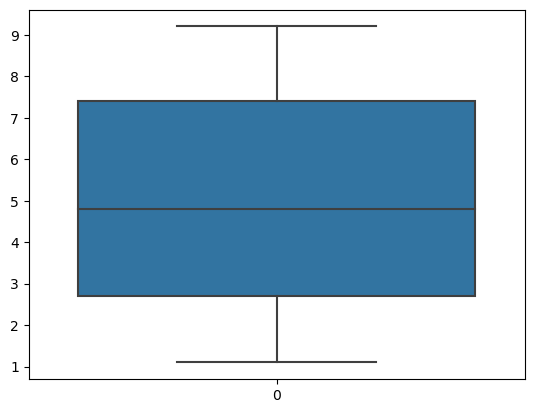

In [10]:
#To visualize the distribution of Hour column
sns.boxplot(df.Hours)

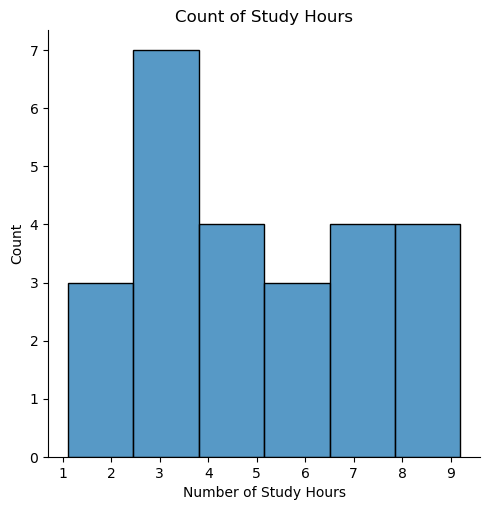

In [11]:
#Hours column analysis
sns.displot(df.Hours)
plt.xlabel('Number of Study Hours')
plt.title('Count of Study Hours')
plt.show()

Observation : 

Normally, most of the students spend 2.5 hours to almost 4 hours per day.


#### Bivariate Analysis

Bivariate analysis is the analysis of two variables simultaneously to determine the relationship between them. Bivariate analysis is used to examine how the value of one variable changes in response to changes in the value of another variable. This type of analysis can help identify correlation, causation, or association between two variables. Bivariate analysis involves calculating the correlation coefficient, scatter plots, and regression analysis.

In [12]:
#Checking correlation between variables
df.corr()

,Hours,Percentage
Hours,1.000000,0.976191
Percentage,0.976191,1.000000


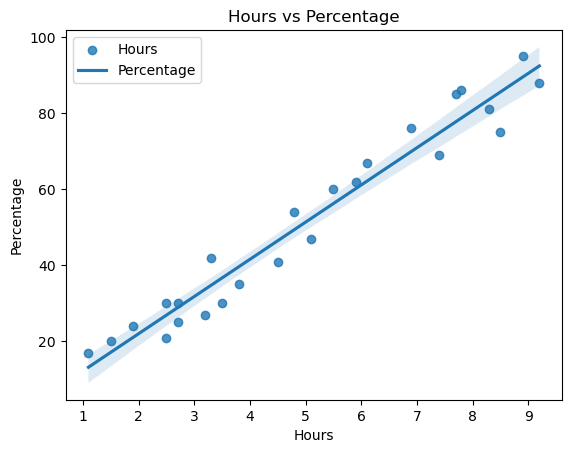

In [13]:
#Relationship between Hours and Percentage
sns.regplot(x = df.Hours, y = df.Percentage)
plt.title('Hours vs Percentage')
plt.legend(df)

### Splitting Data into Variables : Independent and Dependent Variable


In statistical analysis, the independent variable is the variable that is manipulated or controlled by the researcher, while the dependent variable is the variable being observed or measured, and its value depends on the independent variable.

In [14]:
#Independent Variable
X = df.drop('Percentage', axis=1)
X.shape

(25, 1)

In [15]:
#Dependent Variable
y = df.Percentage
y.shape

(25,)

##### Splitting data into Train and Test sets

In machine learning, train-test split is a technique used to evaluate the performance of a predictive model.

The available data is divided into two sets: the training set, which is used to train the model, and the testing set, which is used to evaluate the performance of the model on new, unseen data. The ratio of the data split is typically 70/30 or 80/20, with the majority of the data used for training.

In [16]:
#Importing from sklearn python library
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 45)

In [93]:
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (17, 1)
Shape of X_test :  (8, 1)
Shape of y_train :  (17,)
Shape of y_test :  (8,)


### Model Development

In [94]:
#Importing Simple Linear Regression model

from sklearn.linear_model import LinearRegression

#Instantiate the model
model = LinearRegression()

#Fitting the model in training sets
model.fit(X_train, y_train)

LinearRegression()

Let's go through some important terms in Linear Regression Model:


1. Coefficient(Slope) - represents the change in the dependent variable (y) for a one-unit change in the independent variable (x). The coefficient is the factor by which the independent variable affects the dependent variable.





2. Intercept - The intercept (also known as the constant) represents the predicted value of the dependent variable when the independent variable is zero. In other words, the intercept is the value of y when x = 0. 

The intercept is an important parameter in linear regression because it helps to establish the baseline prediction for the dependent variable, even in cases where the independent variable is not present or is equal to zero.

In [95]:
print('Coefficient :', model.coef_)
print('Intercept : ', model.intercept_)

Coefficient : [9.81092414]
Intercept :  1.2162641848495284


In [96]:
y_pred = model.predict(X_test)
y_pred

array([25.74357453, 27.70575935, 33.59231384, 76.76038004, 19.85702004,
       77.74147245, 38.4977759 , 73.8171028 ])

In [97]:
#Let's check Predicted valuevs Actual Value in a dataframe
Prediction = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
Prediction

,Actual,Predicted
16,30,25.743575
20,30,27.705759
13,42,33.592314
10,85,76.760380
17,24,19.857020
24,86,77.741472
22,35,38.497776
19,69,73.817103


### Model Evaluation

In [98]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score as r2


Mean absolute error (MAE) is the average of the absolute differences between the predicted and actual values of the dependent variable, and provides a measure of the magnitude of the errors in the predictions, without considering their direction.

In [99]:
MAE = mae(y_test, y_pred)
MAE

5.489294806376118

Mean squared error (MSE) is the average of the squared differences between the predicted and actual values of the dependent variable.

In [100]:
MSE = mse(y_test, y_pred)
MSE

35.345962190770884

Coefficient of determination (R-squared) is a measure of how well the linear regression model fits the observed data, with values between 0 and 1 indicating the proportion of the variance in the dependent variable that is explained by the independent variables.

In [101]:
R2 = r2(y_test,y_pred)
R2

0.9391488478760097

Root mean squared error (RMSE) is the square root of the average of the squared differences between the predicted and actual values of the dependent variable, and provides a measure of the magnitude of the errors in the predictions.

In [102]:
RMSE = np.sqrt(MSE)
RMSE

5.945247025210213

Mean absolute percentage error (MAPE) is a measure of the average absolute percentage difference between the predicted and actual values of the dependent variable, and is commonly used in forecasting to evaluate the accuracy of predictions.

In [103]:
MAPE = mape(y_test,y_pred)
MAPE

0.11923479249856675

##### Let's find answer to our question now!

#### What will be the predicted score if a student studies for 9.25 hours/day?

In [105]:
model.predict([[9.25]])

array([91.96731245])

## It means if a student studies for 9.25 hours per day, it can be predicted that the achievable percentage would be 91.9%.